## **8.10 Using a Model**

This notebook simulates using a model that was previously trained.

In [1]:
!pip install seaborn

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL.Image
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.applications.xception as xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [8]:
model = keras.models.load_model('xception_v5_27_0.9886.h5')

In [6]:
root_dir = r'./data/animal_images_small'
test_dir = os.path.join(root_dir, 'test')

# read in the test dataset the same way a validation dataset is read in
test_gen = ImageDataGenerator(preprocessing_function=xception.preprocess_input)
test_ds = test_gen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 350 images belonging to 10 classes.


If the model performs much worse on the test dataset than on the training/validation dataset, then it is further evidence of a possible overfitting.

In [9]:
# returns the loss and the accuracy
model.evaluate(test_ds)

2023-05-13 09:31:57.448410: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-05-13 09:31:58.085236: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-13 09:31:58.086100: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-13 09:31:58.086136: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-05-13 09:31:58.087058: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-13 09:31:58.087143: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


11/11 [==============================] - 7s 331ms/step - loss: 0.0820 - accuracy: 0.9714


[0.08200842887163162, 0.9714285731315613]

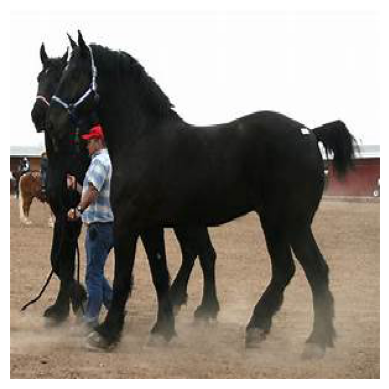

In [12]:
root_dir = r'./data/animal_images_small'
test_dir = os.path.join(root_dir, 'test')

# view a horse image
horse_dir = os.path.join(test_dir, 'horse')
horse_image = os.listdir(horse_dir)[1]

img = load_img(os.path.join(horse_dir, horse_image), target_size=(299, 299))
plt.imshow(img)
plt.axis("off");

In [13]:
img_arr = np.array(img)
IMG_ARR = np.array([img_arr])  # batch of images
IMG_ARR.shape

(1, 299, 299, 3)

In [14]:
X = xception.preprocess_input(IMG_ARR)

In [15]:
classes = ['butterfly',
           'cat',
           'chicken',
           'cow',
           'dog',
           'elephant',
           'horse',
           'sheep',
           'spider',
           'squirrel']

In [16]:
pred = model.predict(X)
dict(zip(classes, pred[0]))

1/1 [==============================] - 1s 881ms/step


{'butterfly': -4.923191,
 'cat': -5.809818,
 'chicken': -3.2363846,
 'cow': 1.0935625,
 'dog': -2.3207338,
 'elephant': -2.464705,
 'horse': 15.545006,
 'sheep': -5.57878,
 'spider': -7.785956,
 'squirrel': -4.455543}

What this means is that the model thinks that the image is most likely to be a *horse* followed by a *cow*. Note that these aren't probabilities but a relative likelihood of belonging to a particular class. They can be turned into probabilities if required.